In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

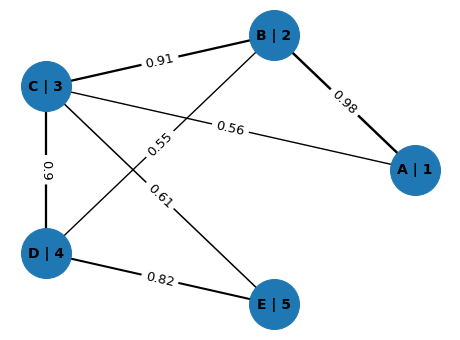

In [2]:
def get_strong_connection():
    base = 0.9
    random_factor = (0.2 * np.random.random()) - 0.1
    return np.round(base + random_factor, 2)

def get_weak_weight():
    base = 0.6
    random_factor = (0.3 * np.random.random()) - 0.15
    return np.round(base + random_factor, 2)

# Enable LaTeX use in matplotlib
mpl.rcParams['text.usetex'] = False
mpl.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'

label0 = 'A | 1'
label1 = 'B | 2'
label2 = 'C | 3'
label3 = 'D | 4'
label4 = 'E | 5'
nodes = [label0, label1, label2, label3, label4]

g = nx.Graph()
g.add_edge(label0, label1, width=get_strong_connection())
g.add_edge(label0, label2, width=get_weak_weight())
g.add_edge(label1, label2, width=get_strong_connection())
g.add_edge(label1, label3, width=get_weak_weight())
g.add_edge(label2, label3, width=get_strong_connection())
g.add_edge(label2, label4, width=get_weak_weight())
g.add_edge(label3, label4, width=get_strong_connection())

edge_widths = {(u, v): d['width'] for u, v, d in g.edges(data=True)}
node_colors = 'tab:blue'

plt.figure(figsize=(8,6))

pos = nx.circular_layout(nodes)
nx.draw_networkx_nodes(g, pos, node_size=2500, node_color=node_colors)
nx.draw_networkx_edges(g, pos, width=2.5 * np.array(list(edge_widths.values())))

edge_labels = nx.get_edge_attributes(g, 'width')
nx.draw_networkx_edge_labels(g, pos, edge_labels=edge_labels, font_size=13)

nx.draw_networkx_labels(g, pos, font_size=14, font_color='black', font_weight='bold')

# Remove black border around plot
ax=plt.gca()
plt.setp(ax, frame_on=False)
plt.savefig('fig__transitive_match_example.png', format='png', bbox_inches='tight')
None

## Move Figures

/tmp/ipykernel_16529/276455068.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + ['Correct', 'Incorrect'], fontsize=font_size-2)
/tmp/ipykernel_16529/276455068.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + ['Correct', 'Incorrect'], rotation=90, va='center', fontsize=font_size-2)


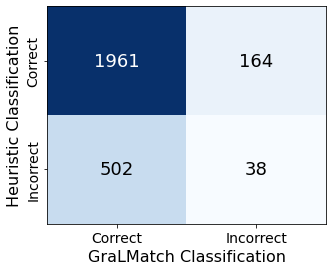

In [57]:
fig, ax = plt.subplots(figsize=(5,4))

font_size = 16
data = [[1961, 164], [502, 38]]

# do a confusion matrix plot
cax = ax.matshow(data, cmap=plt.cm.Blues, aspect='auto')

ax.set_xticklabels([''] + ['Correct', 'Incorrect'], fontsize=font_size-2)
ax.set_yticklabels([''] + ['Correct', 'Incorrect'], rotation=90, va='center', fontsize=font_size-2)


ax.text(0, 0, '1961', ha='center', va='center', color='white', fontsize=font_size+2)
ax.text(0, 1, '502', ha='center', va='center', fontsize=font_size+2)
ax.text(1, 0, '164', ha='center', va='center', fontsize=font_size+2)
ax.text(1, 1, '38', ha='center', va='center', fontsize=font_size+2)
ax.xaxis.set_ticks_position('bottom')
ax.set_xlabel('GraLMatch Classification', fontsize=font_size)
ax.set_ylabel('Heuristic Classification', fontsize=font_size)

None

Text(0, 0.5, 'Number of Processed Records')

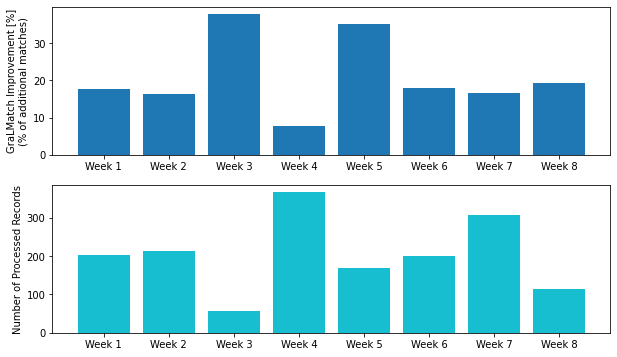

In [69]:
data_i = [17.73, 16.43, 37.93, 7.88, 35.1, 18.09, 16.61, 19.29]
data_p = [203, 213, 58, 368, 168, 199, 307, 114]
labels = [f"Week {i}" for i in range(1, 9)]

fig, axs = plt.subplots(2, figsize=(10,6))

axs[0].bar(labels, data_i)
axs[0].set_ylabel('GraLMatch Improvement [%]\n(% of additional matches)')

axs[1].bar(labels, data_p, color='tab:cyan')
axs[1].set_ylabel('Number of Processed Records')
